In [1]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

**<h4>1. COMPARE PARAMETER VALUES</h4>**

**Choose desired parameter values and variables to plot below.**

In [ ]:
# Parameter values
values = [0.83, 1.5, 2.5]

# Variables to plot PLEASE CHOOSE 12 VARIABLES
varl = ['P_C','P_Y','P_Y_KL','Y','C','C_Y','K','ell','E','r_K','r_ell','r_E',]

**Choose desired parameter, specify a chock, and run the model (might take some time).**

In [ ]:
s1={} # dict for sol
s2={} # dict for ss

for i,value in enumerate(values):
    
    from BabyMAKROModel import BabyMAKROModelClass
    
    model = BabyMAKROModelClass(name='baseline')
    
    par = model.par
    ss = model.ss
    sol = model.sol
    
    # choose parameter
    par.sigma_Y = value
    
    # run model in SS
    model.find_ss(0.50)
    model.set_exo_ss()
    model.set_unknowns_ss()
    model.evaluate_blocks()
    errors = model.get_errors(do_print=True)
    
    # apply shock
    model.calc_jac()
    model.set_exo_ss()
    Tshock = 20
    shock = 0.2*ss.r_E
    persistence = 0.75**np.arange(Tshock)
    sol.r_E[:Tshock] = ss.r_E + shock*persistence

    # run model with shock
    model.set_unknowns_ss()
    model.evaluate_blocks()
    errors = model.get_errors()
    model.find_IRF()

    # save variables in dictonaries
    for var in varl:
        key = str(var+str(i)) 
        s1[key] = sol.__dict__[var]
        s2[key] = ss.__dict__[var]

**Plot the variables and see the effects of different parameter values.**

In [ ]:
T_IRF = 40

fig = plt.figure(figsize=(20,20/1.1))

for i,var in enumerate(varl):
    
    ax = fig.add_subplot(4,3,i+1)
    
    ax.set_ylabel('% of s.s.')
    ax.set_title(var)
     
    for j,value in enumerate(values):
        ax.plot((s1[str(var+str(j))][:T_IRF]/s2[str(var+str(j))]-1)*100)


**<h4>2. COMPARE SHOCKS</h4>**

**Specify shocks and choose variables to plot below.**

In [9]:
# specify shocks
var_l = ['P_F','P_M_C','P_M_X'] # variables to shock
Tshock_l = [20,20,20] # length of shock (periods)
shock_l = [0.01,0.01,0.01] # shock as pct. of ss
pers_l = [0.75,0.75,0.75] # persistence of shock

# Variables to plot PLEASE CHOOSE 12 VARIABLES
varl = ['P_C','P_Y','P_Y_KL','Y','C','C_Y','K','ell','E','r_K','r_ell','r_E',]

**Run model for each shock.**

In [10]:
s1={} # dict for sol
s2={} # dict for ss

for i,(var, Tshock, shock, pers) in enumerate(zip(var_l, Tshock_l, shock_l, pers_l)):
    
    from BabyMAKROModel import BabyMAKROModelClass
    
    model = BabyMAKROModelClass(name='baseline')
    
    par = model.par
    ss = model.ss
    sol = model.sol
    
    # run model in SS
    model.find_ss(0.50)
    model.set_exo_ss()
    model.set_unknowns_ss()
    model.evaluate_blocks()
    errors = model.get_errors(do_print=True)
    
    # apply shock
    model.calc_jac()
    model.set_exo_ss()
    shock = shock*ss.__dict__[var]
    pers = pers**np.arange(Tshock)
    sol.__dict__[var][:Tshock] = ss.__dict__[var] + shock*pers

    # run model with shock
    model.set_unknowns_ss()
    model.evaluate_blocks()
    errors = model.get_errors()
    model.find_IRF()

    # save variables in dictonaries
    for var in varl:
        key = str(var+str(i)) 
        s1[key] = sol.__dict__[var]
        s2[key] = ss.__dict__[var]

bargaining_cond     : abs. max = 2.22e-16
Bq_match            : abs. max = 4.27e-12
FOC_capital_agency  : abs. max = 5.55e-16
FOC_K_ell           : abs. max = 2.22e-16
FOC_E_Y_KL          : abs. max = 1.67e-16
mkt_clearing        : abs. max = 0.00e+00
repacking_prices_C  : abs. max = 0.00e+00
initial:
   max. abs. error = 5.02e+00
    2.22e-16 in bargaining_cond
    4.27e-12 in Bq_match
    5.55e-16 in FOC_capital_agency
    2.22e-16 in FOC_K_ell
    1.67e-16 in FOC_E_Y_KL
    5.02e+00 in mkt_clearing
    0.00e+00 in repacking_prices_C

it = 0
 solve: t1-t0 = 1.8 secs
   max. abs. error = 5.02e+00
    6.09e-04 in bargaining_cond
    8.47e-03 in Bq_match
    1.75e-04 in FOC_capital_agency
    3.48e-04 in FOC_K_ell
    1.70e-04 in FOC_E_Y_KL
    2.19e-01 in mkt_clearing
    1.89e-04 in repacking_prices_C
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.1 secs

it = 1
 solve: t1-t0 = 1.1 secs
   max. abs. error = 2.19e-01
    9.93e-05 in bargaining_cond
    4.75e-04 in Bq_match
    2.63

**Plot the variables and compare the shocks.**

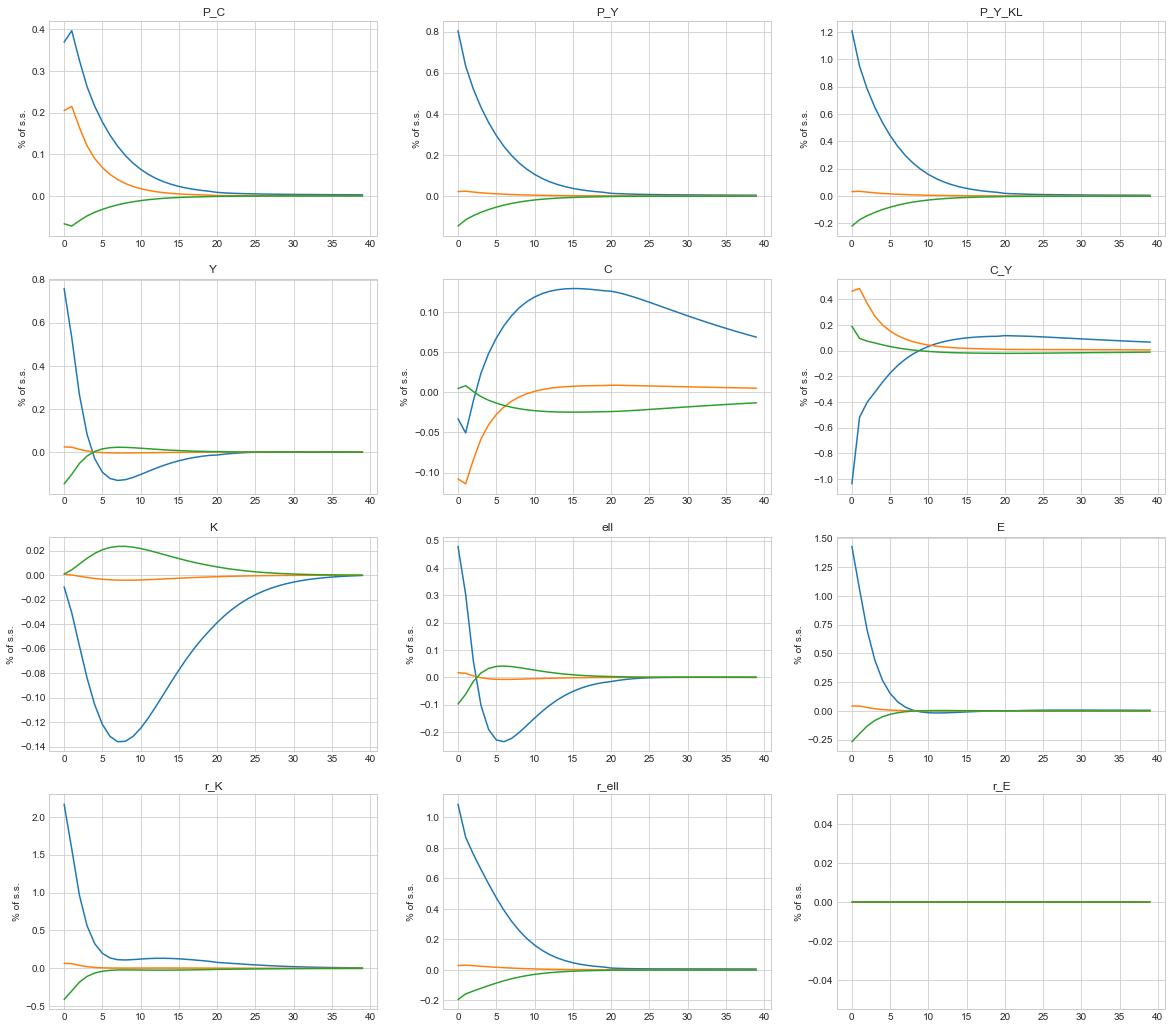

In [11]:
T_IRF = 40

fig = plt.figure(figsize=(20,20/1.1))

for i,var in enumerate(varl):
    
    ax = fig.add_subplot(4,3,i+1)
    
    ax.set_ylabel('% of s.s.')
    ax.set_title(var)
     
    for j,value in enumerate(var_l):
        ax.plot((s1[str(var+str(j))][:T_IRF]/s2[str(var+str(j))]-1)*100)